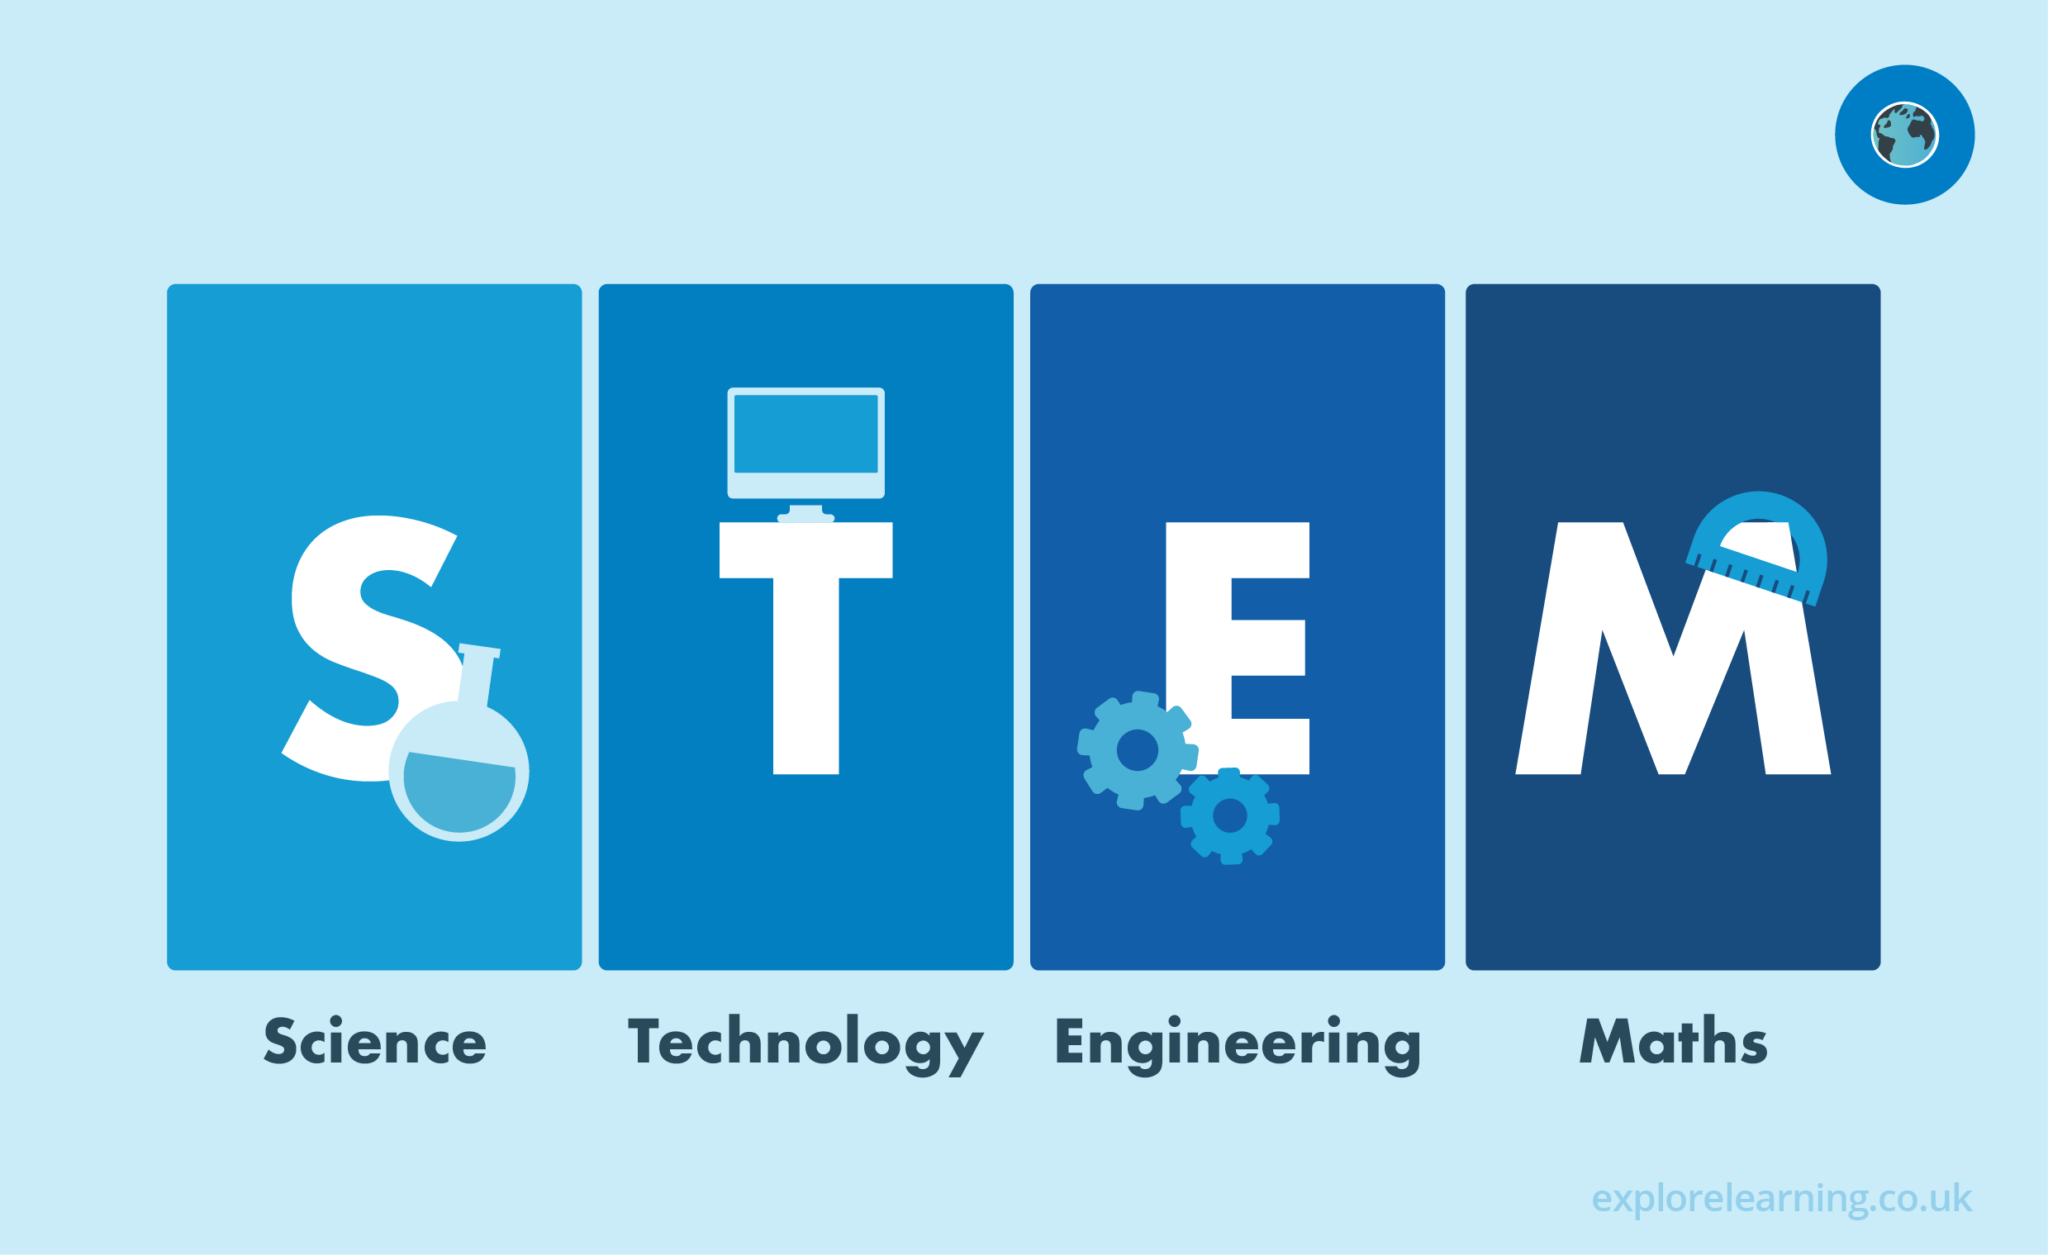

# STEMEX: STEM Analysis Tool

## **STEM Explorer**

This notebook presents a tool designed to help students analyze information from a scientific perspective, fostering critical thinking and enhancing STEM (Science, Technology, Engineering, and Mathematics) education. 

## **What is STEM Education?**
STEM education integrates the disciplines of science, technology, engineering, and mathematics, focusing on interdisciplinary learning. It emphasizes real-world problem solving, innovation, and collaboration, preparing students for challenges in a rapidly advancing technological world.

## **Why is STEM Education Important?**
STEM education is vital because:
- It nurtures critical thinking, creativity, and problem-solving skills.
- It equips students with knowledge and skills for high-demand careers in science and technology.
- It fosters innovation and adaptability in addressing complex global issues.

By encouraging students to think critically about scientific concepts and evaluate information rigorously, STEM education helps them become informed citizens and innovators.

## **How STEMEX Supports STEM Education**
This tool enables students to:
1. **Analyze Scientific Content**: Summarize key concepts, facts, and data from online scientific resources.
2. **Identify Critical Elements**: Highlight important visual elements, such as graphs or data sets, that support learning.
3. **Engage in STEM Activities**: Propose learning activities and experiments based on the analyzed content.
4. **Develop Critical Thinking**: Pose questions that encourage evaluation of the credibility and reliability of the information.

By integrating this tool into STEM learning, educators can provide students with a structured approach to analyzing and applying scientific knowledge effectively.


In [1]:
import ollama
import os
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display

In [2]:
class Website:

    def __init__(self, url):
        """
        Create this Website object from the given url using the BeautifulSoup library
        """
        self.url = url
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        self.text = soup.body.get_text(separator="\n", strip=True)

In [3]:
def user_prompt_for(website):
    user_prompt = f"You are reviewing a website titled '{website.title}' for a STEM learning activity."
    user_prompt += "\n\nYour tasks are as follows:"
    user_prompt += "\n1. Briefly summarize the main scientific concepts or topics covered on the website."
    user_prompt += "\n2. Identify and describe key facts, data, or visual elements (e.g., charts, graphs) that support learning."
    user_prompt += "\n3. Propose STEM learning activities that students can use to solve real-world problems or conduct experiments."
    user_prompt += "\n4. Pose critical thinking questions to encourage students to evaluate the content's reliability and validity."
    user_prompt += "\n\nYour response must follow this Markdown structure:\n"
    user_prompt += """
# STEM Website Analysis

## Summary of the Main Scientific Concepts
[Provide a concise summary of the main scientific concepts or topics covered on the website.]

## Key Facts, Data, or Visual Elements
- [List key facts or data points, one per line.]
- [Describe any visual elements, such as charts, graphs, or images, that enhance understanding.]

## Suggested STEM Learning Activities
1. [Propose activities or experiments that students can conduct using the information provided.]
2. [Relate these activities to real-world STEM problems or applications.]

## Questions for Critical Thinking
1. [Pose questions that encourage students to critically evaluate the content.]
2. [Focus questions on the reliability of the data, the validity of conclusions, or alternative interpretations.]
"""
    user_prompt += "\n\nWebsite Content:\n"
    user_prompt += website.text
    return user_prompt


In [4]:
def messages_for(website):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_for(website)}
    ]

In [5]:
def summarize(url):
    website = Website(url)
    response = ollama.chat(model=MODEL, messages=messages_for(website))
    return response['message']['content']

In [6]:
def display_summary(url):
    summary = summarize(url)
    display(Markdown(summary))

In [7]:
system_prompt = """
You are a STEM educator helping students explore scientific content on a website. 
Your role is to guide students in analyzing the website's scientific concepts, identifying key facts or data, 
and suggesting how this information can be applied in STEM learning activities. 

It is critical that you adhere to the following Markdown structure in your response:

# STEM Website Analysis

## Summary of the Main Scientific Concepts
[Provide a concise summary of the main scientific concepts or topics covered on the website.]

## Key Facts, Data, or Visual Elements
- [List key facts or data points, one per line.]
- [Describe any visual elements, such as charts, graphs, or images, that enhance understanding.]

## Suggested STEM Learning Activities
1. [Propose activities or experiments that students can conduct using the information provided.]
2. [Relate these activities to real-world STEM problems or applications.]

## Questions for Critical Thinking
1. [Pose questions that encourage students to critically evaluate the content.]
2. [Focus questions on the reliability of the data, the validity of conclusions, or alternative interpretations.]

If any section lacks sufficient content, explicitly state: "No information available for this section."
"""

In [8]:
MODEL = "llama3.2"

In [9]:
display_summary("https://www.nationalgeographic.com/science/article/science-of-eternal-flame")

# STEM Website Analysis

## Summary of the Main Scientific Concepts

The article discusses eternal flames, also known as geological hydrocarbon seeps, which are natural sources of greenhouse gases and photochemical pollutants. These fires occur when gas from underground reservoirs escapes through cracks in the ground, fueled by coal seams or other organic matter. The article highlights the unique features of eternal flames, their environmental impact, and how they can be extinguished.

## Scientific Concepts

* Geology: The formation and movement of rocks, as well as the processes that shape the Earth's surface.
* Hydrocarbon seeps: Natural sources of greenhouse gases and photochemical pollutants.
* Methane emissions: A significant contributor to climate change.
* Environmental impact: The effects of eternal flames on the surrounding environment, including air pollution and erosion.

## Key Takeaways

* Eternal flames are not truly "eternal" but can persist for thousands of years due to geological processes.
* The environmental impact of eternal flames is negligible compared to industrial emissions.
* Drilling for gas can potentially harm or extinguish nearby eternal flames by altering the pressure of the gas reservoir that fuels them.

## Educational Questions

1. What causes eternal flames, and how do they differ from other types of fires?
2. How do geological processes shape the Earth's surface and create conditions for eternal flames to form?
3. What are the environmental implications of eternal flames, and how do they compare to industrial emissions?

## Activities

1. Research and create a list of different types of hydrocarbon seeps and their characteristics.
2. Investigate the role of methane in climate change and its impact on the environment.
3. Design an experiment to measure the effects of drilling for gas on nearby eternal flames.

## Extensions

1. Study the mythology and cultural significance of eternal flames, such as the "Gate to Hell" or the Chimaera.
2. Explore the history of scientific discovery related to hydrocarbon seeps and geological processes.
3. Develop a model or simulation to predict the behavior of eternal flames in different environmental conditions.